In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,1243027560,1243027818,1242163613,1242164398,0,0
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,1243555740,1243556121,1240963795,1240966730,18,1
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,1243769880,1243770317,1241177914,1241180541,1,0


In [8]:
train.shape

(108129, 14)

In [9]:
test.shape

(63465, 12)

In [10]:
train.isnull().sum()

project_id               0
name                     1
desc                     8
goal                     0
keywords                 0
disable_communication    0
country                  0
currency                 0
deadline                 0
state_changed_at         0
created_at               0
launched_at              0
backers_count            0
final_status             0
dtype: int64

In [11]:
test.isnull().sum()

project_id               0
name                     0
desc                     4
goal                     0
keywords                 0
disable_communication    0
country                  0
currency                 0
deadline                 0
state_changed_at         0
created_at               0
launched_at              0
dtype: int64

In [7]:
train[(train['disable_communication'] == True)].shape[0]

323

In [12]:
train[train['name'].isnull()]

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
13244,kkst881978749,NaN,NaN,35000.0,you-have-the-power-to-put-our-film-in-theaters,False,US,USD,1323061140,1323061142,1320612894,1320620155,5,0


In [13]:
train[train['desc'].isnull()]

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
13244,kkst881978749,NaN,NaN,35000.0,you-have-the-power-to-put-our-film-in-theaters,False,US,USD,1323061140,1323061142,1320612894,1320620155,5,0
19276,kkst716015319,N/A (Canceled),NaN,50000.0,the-lineup-0,False,US,USD,1335042707,1331581327,1331063276,1331158307,0,0
67393,kkst493162275,OF Press - A WordPress Theme and Site Builder ...,NaN,5000.0,of-press,False,US,USD,1407707123,1406761089,1405032789,1405115123,4,0
67632,kkst2143840399,Blue Heart - Natural Remedies (Canceled),NaN,1500.0,blue-heart-natural-remedies,False,US,USD,1407811896,1407024116,1404522581,1405219896,3,0
68852,kkst810592516,Vending Machine (Canceled),NaN,100.0,online-sticker-book-vending-machine,False,US,USD,1408334400,1408333920,1406991938,1407441222,2,0
75158,kkst511508475,TEST (Canceled),NaN,1000001.0,caiman-connected-the-ultimate-mobile-device-ac...,False,US,USD,1411793329,1411694770,1410013102,1410583729,2,0
98721,kkst580040638,N/A (Canceled),NaN,100000.0,international-festival-of-language-and-culture,False,US,USD,1427901540,1424449267,1424103554,1424210815,0,0
104401,kkst93676199,None (Canceled),NaN,500.0,2-songs-seduce-your-dreams-pop-and-latin-kizom...,False,US,USD,1430928908,1430446941,1429640876,1430064908,0,0


In [18]:
for col in train.columns:
    print(col)
    print(train[col].unique())
    print("")
    print("")

project_id
['kkst1451568084' 'kkst1474482071' 'kkst183622197' ... 'kkst1421442073'
 'kkst2022543055' 'kkst169301870']


name
['drawing for dollars'
 'Sponsor Dereck Blackburn (Lostwars) Artist in Residence in Kankakee Illinois'
 'Mr. Squiggles' ...
 'Creating High Quality Art Prints from the Artist Herron'
 'back to basics' 'Happy Olive, Mediterranean Wraps']


desc
['I like drawing pictures. and then i color them too. so i thought i would suggest something for me to draw and then if someone wants...'
 'I, Dereck Blackburn will be taking upon an incredible journey in the month of May 2009. I will be traveling to my hometown of Kankakee...'
 'So I saw darkpony\'s successfully funded drawing for dollars project and I thought """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""That\'s fun."""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

In [21]:
test[test['disable_communication'] == True].shape[0]

346

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C56E353550>]],
      dtype=object)

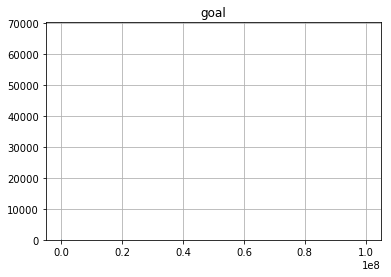

In [4]:
plt.hist(np.clip(train[train['currency'] = 'USD']['goal']))

In [31]:
train[train['currency'] == 'USD']['goal'].max()

100000000.0

In [32]:
train[train['currency'] == 'USD']['goal'].min()

0.01

In [33]:
train[train['goal'] == 0.01]

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
317,kkst613550619,LOVELAND Round 6: A Force More Powerful,$1 a square inch in Detroit + super fun excite...,0.01,loveland-round-6-a-force-more-powerful,False,US,USD,1259906820,1259907306,1259129231,1259132089,6,1


In [34]:
train[train['goal'] == 100000000]

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
65916,kkst1610749882,A Billion Pixels...,"A billion pixel website, a billion pixel displ...",100000000.0,a-billion-pixels,False,US,USD,1407188374,1407188374,1398980867,1402004374,6,0
76555,kkst2057699383,Our future,The new century has begun may our life's get e...,100000000.0,our-future,False,AU,AUD,1412701539,1412701539,1406946130,1407517539,1,0
93957,kkst1500651150,The Multi-Trillion Dollar Dream™ (Canceled),We are designing The Multi-Trillion Dollar Dre...,100000000.0,the-multi-trillion-dollar-dreamtm,False,US,USD,1425283140,1421858983,1420129462,1420654265,1,0
94283,kkst293714421,UniqueTrends,UniqueTrends. Lasting memories that never go ...,100000000.0,uniquetrends,False,US,USD,1425509545,1425509547,1422628173,1422917545,1,0
95920,kkst2090929071,Billionaire Boy Blog (Canceled),An exclusive blog about a 18 year old milliona...,100000000.0,billionaire-boy-blog,False,DK,DKK,1426394700,1423931157,1423681849,1423806300,0,0
100553,kkst971743842,"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""...","This cartoon is about the main character """"""""""...",100000000.0,pg-reanimated-cartoons,False,US,USD,1428788893,1428788893,1423386648,1423608570,0,0
104162,kkst1930874785,Jesus Priest,This is NOT a religious movie project despite ...,100000000.0,jesus-priest,False,CA,CAD,1430755200,1430755214,1414854625,1425592631,1,0


In [5]:
train['final_status'].value_counts()

0    73568
1    34561
Name: final_status, dtype: int64

In [8]:
train['backers_count'].max()

219382

In [9]:
train[train['backers_count'] == 219382]

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
92361,kkst581550534,Exploding Kittens,This is a card game for people who are into ki...,10000.0,exploding-kittens,False,US,USD,1424397600,1424397679,1418632794,1421776819,219382,1


In [11]:
train[(train['backers_count'] >= 0) & (train['backers_count'] < 100)]['backers_count'].count()

89354

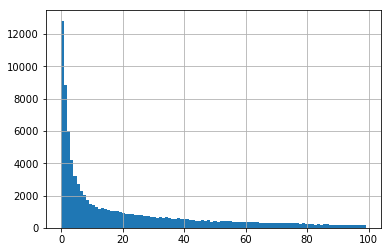

In [14]:
train[(train['backers_count'] >= 0) & (train['backers_count'] < 100)]['backers_count'].hist(bins=100)

In [29]:
train[train['backers_count'] > 9000]['final_status'].value_counts()

1    104
Name: final_status, dtype: int64

In [25]:
train[(train['backers_count'] > 5000) & (train['final_status'] == 0)]

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
30719,kkst1354390191,Hero-U: Rogue to Redemption by the Quest for G...,Hero-U is a turn-based PC RPG with adventure g...,400000.0,hero-u-rogue-to-redemption,False,US,USD,1353443400,1353443432,1348299872,1350675073,6093,0
35213,kkst958457175,PROJECT AWAKENED,Craft the videogame character of your dreams. ...,500000.0,project-awakened,False,US,USD,1362584400,1362584400,1357792081,1359992400,6287,0
58005,kkst1245108404,Outcast Reboot HD,Taking one of the most engrossing open-world a...,600000.0,outcast-reboot-hd,False,US,USD,1399499940,1399499964,1394102692,1396883151,5194,0
80667,kkst15305518,THE BLACK GLOVE,"An eerie, surrealistic, first-person game expe...",550000.0,the-black-glove,False,US,USD,1415395800,1415395813,1404827063,1412627444,5961,0
81147,kkst47587774,anonabox : a Tor hardware router (Suspended),The anonabox is an open source embedded networ...,7500.0,anonabox-a-tor-hardware-router,True,US,USD,1415755186,1413567021,1408581552,1413159586,8928,0
100410,kkst535795688,Descent: Underground,Descent is back! Pilot your ship & battle foes...,600000.0,descent-underground,False,US,USD,1428710400,1428710419,1422892173,1426005725,8164,0


In [31]:
from keras.preprocessing import sequence
from keras.models import Model, Input
from keras.layers import Dense, SpatialDropout1D, Dropout
from keras.layers import Embedding, GlobalMaxPool1D, BatchNormalization
from keras.preprocessing.text import Tokenizer

C:\Users\admin\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [37]:
# Set parameters:
max_features = 50000
maxlen = 150
batch_size = 32
embedding_dims = 64
epochs = 4

In [34]:
X_train = train['desc'].fillna('sterby').values
y_train = train['final_status'].values
X_test = test['desc'].fillna('sterby').values

In [38]:
print('Tokenizing data...')
tok = Tokenizer(num_words=max_features)
tok.fit_on_texts(list(X_train) + list(X_test))
x_train = tok.texts_to_sequences(X_train)
x_test = tok.texts_to_sequences(X_test)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print('Average train sequence length: {}'.format(np.mean(list(map(len, x_train)), dtype=int)))
print('Average test sequence length: {}'.format(np.mean(list(map(len, x_test)), dtype=int)))

Tokenizing data...
108129 train sequences
63465 test sequences
Average train sequence length: 19
Average test sequence length: 19


In [39]:
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Pad sequences (samples x time)
x_train shape: (108129, 150)
x_test shape: (63465, 150)


In [40]:
print('Build model...')
comment_input = Input((maxlen,))

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
comment_emb = Embedding(max_features, embedding_dims, input_length=maxlen)(comment_input)

# we add a GlobalMaxPool1D, which will extract information from the embeddings
# of all words in the document
comment_emb = SpatialDropout1D(0.25)(comment_emb)
max_emb = GlobalMaxPool1D()(comment_emb)

# normalized dense layer followed by dropout
main = BatchNormalization()(max_emb)
main = Dense(64)(main)
main = Dropout(0.5)(main)

# We project onto a six-unit output layer, and squash it with sigmoids:
output = Dense(1, activation='sigmoid')(main)

model = Model(inputs=comment_input, outputs=output)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Build model...


In [ ]:
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 97316 samples, validate on 10813 samples
Epoch 1/4
80288/97316 [=======================>......] - ETA: 26s - loss: 0.5359 - acc: 0.73105   

In [43]:
y_pred = model.predict(x_test)

In [44]:
submission = pd.read_csv("samplesubmission.csv")

In [45]:
y_pred[0:5]

array([[0.17754914],
       [0.30666038],
       [0.5111607 ],
       [0.58489686],
       [0.32162845]], dtype=float32)

In [48]:
test.head(5)

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at
0,kkst917493670,Bràthair.,"My first film, of many to come. Trying to purs...",7000.0,brathair,False,US,USD,1449619185,1449619185,1446002581,1446159585
1,kkst1664901914,THE SCREENWRITER,A young man that has earned his master's in sc...,35000.0,the-screenwriter,False,US,USD,1453435620,1453435620,1450297323,1450411620
2,kkst925125077,The Hornets Nest the Fairmont Heights Story,Film about a high school constructed for negro...,49500.0,the-hornets-nest-the-fairmont-heights-story,False,US,USD,1451780700,1451780700,1448581356,1448672128
3,kkst1427645275,BROTHERS Season 2 - Groundbreaking Transgender...,The acclaimed series about a group of transgen...,40000.0,brothers-season-2-groundbreaking-transgender-male,False,US,USD,1445021518,1445021530,1440966830,1442429518
4,kkst1714249266,Blackdom the movie,Blackdom's history offers a new narrative tha...,20000.0,blackdom-the-movie,False,US,USD,1462068840,1462068844,1455765276,1458334890


In [47]:
train.head(5)

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,1243027560,1243027818,1242163613,1242164398,0,0
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,1243555740,1243556121,1240963795,1240966730,18,1
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,1243769880,1243770317,1241177914,1241180541,1,0


In [49]:
submission['final_status'] = y_pred

In [50]:
submission.head()

,project_id,final_status
0,kkst917493670,0.177549
1,kkst1664901914,0.306660
2,kkst925125077,0.511161
3,kkst1427645275,0.584897
4,kkst1714249266,0.321628


In [62]:
submission['final_status'] = (submission['final_status'] >= 0.5).astype(int)

In [63]:
submission.head()

,project_id,final_status
0,kkst917493670,0
1,kkst1664901914,0
2,kkst925125077,1
3,kkst1427645275,1
4,kkst1714249266,0


In [64]:
submission.to_csv('keras_desc.csv', index=False, encoding='utf-8')

In [65]:
submission['final_status'].value_counts()

0    50436
1    13029
Name: final_status, dtype: int64

In [66]:
train_lr = train[['goal', 'disable_communication', 'currency', 'final_status']]
test_lr = test[['goal', 'disable_communication', 'currency']]

In [71]:
train[(train['deadline'] > train['state_changed_at']) & (train['final_status'] == 0)].count()

project_id               5880
name                     5880
desc                     5873
goal                     5880
keywords                 5880
disable_communication    5880
country                  5880
currency                 5880
deadline                 5880
state_changed_at         5880
created_at               5880
launched_at              5880
backers_count            5880
final_status             5880
dtype: int64

In [73]:
train[(train['deadline'] > train['state_changed_at']) & (train['final_status'] == 1)].count()

project_id               0
name                     0
desc                     0
goal                     0
keywords                 0
disable_communication    0
country                  0
currency                 0
deadline                 0
state_changed_at         0
created_at               0
launched_at              0
backers_count            0
final_status             0
dtype: int64

In [74]:
train_lr['cancelled'] = (train['deadline'] > train['state_changed_at']).astype(int)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [76]:
train_lr['cancelled'].value_counts()

0    102249
1      5880
Name: cancelled, dtype: int64

In [77]:
train_lr.head()

,goal,disable_communication,currency,final_status,cancelled
0,20.0,False,USD,1,0
1,300.0,False,USD,0,0
2,30.0,False,USD,0,0
3,500.0,False,USD,1,0
4,2000.0,False,USD,0,0


In [79]:
train_lr['disable_communication'] = train_lr['disable_communication'].astype(int)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [80]:
train_lr.head()

,goal,disable_communication,currency,final_status,cancelled
0,20.0,0,USD,1,0
1,300.0,0,USD,0,0
2,30.0,0,USD,0,0
3,500.0,0,USD,1,0
4,2000.0,0,USD,0,0


In [81]:
test_lr['cancelled'] = (test['deadline'] > test['state_changed_at']).astype(int)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [82]:
test_lr['disable_communication'] = test_lr['disable_communication'].astype(int)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [83]:
test_lr.head()

,goal,disable_communication,currency,cancelled
0,7000.0,0,USD,0
1,35000.0,0,USD,0
2,49500.0,0,USD,0
3,40000.0,0,USD,0
4,20000.0,0,USD,0


In [84]:
test_lr['currency'].unique()

array(['USD', 'EUR', 'GBP', 'AUD', 'NOK', 'SEK', 'DKK', 'CAD', 'NZD',
       'CHF', 'HKD', 'SGD', 'MXN'], dtype=object)

In [85]:
train_lr['currency'].unique()

array(['USD', 'GBP', 'CAD', 'AUD', 'NZD', 'EUR', 'SEK', 'NOK', 'DKK'],
      dtype=object)

In [86]:
train_lr['currency'].value_counts()

USD    92033
GBP     8758
CAD     3736
AUD     1880
EUR      817
NZD      355
SEK      240
DKK      196
NOK      114
Name: currency, dtype: int64

In [89]:
train_lr[(train_lr['currency'] == 'NOK')]['final_status'].value_counts(normalize=True) 

0    0.842105
1    0.157895
Name: final_status, dtype: float64

In [90]:
train_lr[(train_lr['currency'] == 'DKK')]['final_status'].value_counts(normalize=True) 

0    0.77551
1    0.22449
Name: final_status, dtype: float64

In [91]:
train_lr[(train_lr['currency'] == 'SEK')]['final_status'].value_counts(normalize=True) 

0    0.8125
1    0.1875
Name: final_status, dtype: float64

In [92]:
train_lr[(train_lr['currency'] == 'NZD')]['final_status'].value_counts(normalize=True) 

0    0.774648
1    0.225352
Name: final_status, dtype: float64

In [93]:
train_lr[(train_lr['currency'] == 'EUR')]['final_status'].value_counts(normalize=True) 

0    0.864137
1    0.135863
Name: final_status, dtype: float64

In [94]:
train_lr[(train_lr['currency'] == 'AUD')]['final_status'].value_counts(normalize=True) 

0    0.817553
1    0.182447
Name: final_status, dtype: float64

In [95]:
train_lr[(train_lr['currency'] == 'CAD')]['final_status'].value_counts(normalize=True) 

0    0.775964
1    0.224036
Name: final_status, dtype: float64

In [96]:
train_lr[(train_lr['currency'] == 'GBP')]['final_status'].value_counts(normalize=True) 

0    0.713405
1    0.286595
Name: final_status, dtype: float64

In [97]:
train_lr[(train_lr['currency'] == 'USD')]['final_status'].value_counts(normalize=True) 

0    0.667804
1    0.332196
Name: final_status, dtype: float64

In [99]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [103]:
label_encoder = LabelEncoder()

In [105]:
int_encoded_currency = label_encoder.fit_transform(test_lr['currency'].unique())

In [108]:
int_encoded_currency

array([12,  4,  5,  0,  8, 10,  3,  1,  9,  2,  6, 11,  7], dtype=int64)

In [109]:
int_encoded_currency = int_encoded_currency.reshape(len(int_encoded_currency), 1)

In [110]:
int_encoded_currency

array([[12],
       [ 4],
       [ 5],
       [ 0],
       [ 8],
       [10],
       [ 3],
       [ 1],
       [ 9],
       [ 2],
       [ 6],
       [11],
       [ 7]], dtype=int64)

In [107]:
onehot_encoder = OneHotEncoder(sparse=False)

In [111]:
onehot_encoded_currency = onehot_encoder.fit_transform(int_encoded_currency)

In [112]:
onehot_encoded_currency

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [113]:
onehot_encoder_sparse = OneHotEncoder(sparse=True)

In [114]:
onehot_encoded_currency_sparse = onehot_encoder_sparse.fit_transform(int_encoded_currency)

In [115]:
onehot_encoded_currency_sparse

<13x13 sparse matrix of type '<class 'numpy.float64'>'
	with 13 stored elements in Compressed Sparse Row format>

In [116]:
print(onehot_encoded_currency_sparse)

  (0, 12)	1.0
  (1, 4)	1.0
  (2, 5)	1.0
  (3, 0)	1.0
  (4, 8)	1.0
  (5, 10)	1.0
  (6, 3)	1.0
  (7, 1)	1.0
  (8, 9)	1.0
  (9, 2)	1.0
  (10, 6)	1.0
  (11, 11)	1.0
  (12, 7)	1.0


In [117]:
train_lr.head()

,goal,disable_communication,currency,final_status,cancelled
0,20.0,0,USD,1,0
1,300.0,0,USD,0,0
2,30.0,0,USD,0,0
3,500.0,0,USD,1,0
4,2000.0,0,USD,0,0


In [118]:
test_lr.head()

,goal,disable_communication,currency,cancelled
0,7000.0,0,USD,0
1,35000.0,0,USD,0
2,49500.0,0,USD,0
3,40000.0,0,USD,0
4,20000.0,0,USD,0


In [127]:
all_data = train_lr.append(test_lr, ignore_index=True)

In [130]:
all_onehot = pd.get_dummies(all_data['currency'])

In [131]:
all_data.drop('currency', axis=1, inplace=True)

In [132]:
all_data = all_data.join(all_onehot)

In [137]:
all_data.head()

,cancelled,disable_communication,final_status,goal,AUD,CAD,CHF,DKK,EUR,GBP,HKD,MXN,NOK,NZD,SEK,SGD,USD
0,0,0,1.0,20.0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0.0,300.0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0.0,30.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1.0,500.0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0.0,2000.0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [126]:
all_onehot.head()

,AUD,CAD,CHF,DKK,EUR,GBP,HKD,MXN,NOK,NZD,SEK,SGD,USD
0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,1


In [139]:
train_final = all_data[0: train.shape[0]]

In [142]:
test_final = all_data[train.shape[0] :]

In [146]:
test_final.drop('final_status', inplace=True, axis=1)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [150]:
test_final['keras_desc'] = y_pred

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [152]:
test_final.head()

,cancelled,disable_communication,goal,AUD,CAD,CHF,DKK,EUR,GBP,HKD,MXN,NOK,NZD,SEK,SGD,USD,keras_desc
108129,0,0,7000.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.177549
108130,0,0,35000.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.306660
108131,0,0,49500.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.511161
108132,0,0,40000.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.584897
108133,0,0,20000.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.321628


In [155]:
y_pred_train = model.predict(x_train)

In [157]:
train_final['keras_desc'] = y_pred_train

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [161]:
train_final.head()

,cancelled,disable_communication,final_status,goal,AUD,CAD,CHF,DKK,EUR,GBP,HKD,MXN,NOK,NZD,SEK,SGD,USD,keras_desc
0,0,0,1.0,20.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.131642
1,0,0,0.0,300.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.199090
2,0,0,0.0,30.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.203095
3,0,0,1.0,500.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.253961
4,0,0,0.0,2000.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.345808


In [159]:
import xgboost as xgb

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [163]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

In [185]:
def modelfit(model, train_data, train_label, predictors, eval_metric, useTrainCV=True, cv_folds=5, early_stopping_rounds=100):

    if useTrainCV:
        xgb_param = model.get_xgb_params()
        params = {
            'objective': xgb_param['objective'],
            'base_score': xgb_param['base_score'],
            'colsample_bylevel': xgb_param['colsample_bylevel'],
            'colsample_bytree': xgb_param['colsample_bytree'],
            'gamma': xgb_param['gamma'],
            'eta': xgb_param['learning_rate'],
            'max_delta_step': xgb_param['max_delta_step'],
            'max_depth': xgb_param['max_depth'],
            'min_child_weight': xgb_param['min_child_weight'],
            'alpha': xgb_param['reg_alpha'],
            'lambda': xgb_param['reg_lambda'],
            'scale_pos_weight': xgb_param['scale_pos_weight'],
            'subsample': xgb_param['subsample']
        }

        dtrain = xgb.DMatrix(data=train_data[predictors], label=train_label)
        cvresult = xgb.cv(params, dtrain, num_boost_round=model.get_params()['n_estimators'], stratified=True, nfold=cv_folds, metrics=eval_metric, early_stopping_rounds=early_stopping_rounds)
        model.set_params(n_estimators=cvresult.shape[0])
        # print(cvresult)
        print("########### n_estimators = %f" % cvresult.shape[0])

    # Fit the algorithm on the data
    model.fit(train_data[predictors], train_label, eval_metric=eval_metric)

    # Predict training set:
    train_predictions = model.predict(train_data[predictors])

    # Predict training set probablities:
    train_proba = model.predict_proba(train_data[predictors])[:,1]
    # Predict X_valid set:
    #valid_predictions = model.predict(X_valid[predictors])

    # Print model report:
    print("\nModel Report")
    print("Accuracy (Train): %.5g" % accuracy_score(train_label, train_predictions))
    print("AUC score (Train): %.5g" % roc_auc_score(train_label, train_proba))
    #print("Accuracy (Validation): %.5g" % accuracy_score(y_valid, valid_predictions))

    feat_imp = pd.Series(model.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    plt.show()
    return model

In [162]:
clf = xgb.XGBClassifier(objective='reg:logistic', learning_rate=0.1, max_depth=4, n_estimators=190, subsample=0.8, colsample_bytree=0.8, gamma=0.1, min_child_weight=1, reg_alpha=0.001)

In [166]:
features = [i for i in test_final.columns]

########### n_estimators = 46.000000


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy (Train): 0.8379
AUC score (Train): 0.90177


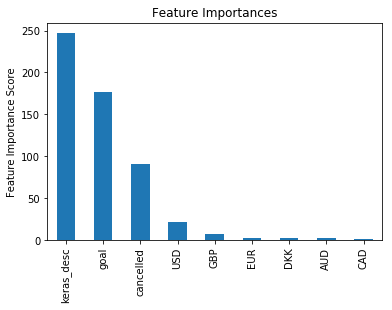

In [175]:
clf = modelfit(clf, train_final, train_final['final_status'].tolist(), features)

In [176]:
final_pred = clf.predict(test_final[features])

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [178]:
pd.Series(final_pred).value_counts()

0.0    51530
1.0    11935
dtype: int64

In [179]:
len(final_pred)

63465

In [181]:
submission['final_status'] = final_pred.astype(int)

In [182]:
submission.head()

,project_id,final_status
0,kkst917493670,0
1,kkst1664901914,0
2,kkst925125077,0
3,kkst1427645275,1
4,kkst1714249266,0


In [183]:
submission.to_csv('stack.csv', index=False, encoding='utf-8')

In [187]:
clf1 = xgb.XGBClassifier(objective='reg:logistic', learning_rate=0.1, max_depth=5, n_estimators=1000, subsample=0.8, colsample_bytree=0.8, gamma=0.1, min_child_weight=2, reg_alpha=0.001)

########### n_estimators = 83.000000


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy (Train): 0.83893
AUC score (Train): 0.90303


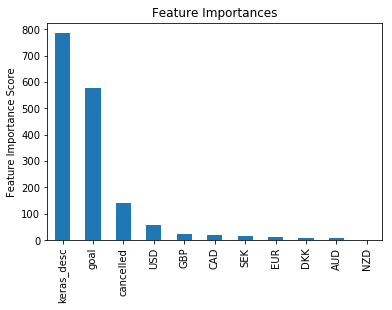

In [188]:
clf1 = modelfit(clf1, train_final, train_final['final_status'].tolist(), features, 'auc', cv_folds=10, early_stopping_rounds=50)

In [189]:
submission['final_status'] =  clf1.predict(test_final[features]).astype(int)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [190]:
submission.to_csv('stack1.csv', index=False, encoding='utf-8')

In [197]:
test_final['temp_pred'] = submission['final_status'].values

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [198]:
test_final

,cancelled,disable_communication,goal,AUD,CAD,CHF,DKK,EUR,GBP,HKD,MXN,NOK,NZD,SEK,SGD,USD,keras_desc,temp_pred
108129,0,0,7000.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.177549,0
108130,0,0,35000.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.306660,0
108131,0,0,49500.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.511161,1
108132,0,0,40000.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.584897,1
108133,0,0,20000.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.321628,0
108134,0,0,10000.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.122300,0
108135,0,0,1000.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.586161,1
108136,0,0,300.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.230645,0
108137,0,0,6000.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.201412,0
108138,0,0,8000.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.535224,1


In [204]:
test_final.loc[(test_final['disable_communication'] == 1), 'temp_pred'] = 0

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [205]:
test_final[test_final['disable_communication'] == 1]['temp_pred'].value_counts()

0    346
Name: temp_pred, dtype: int64